# 🚀 Helicase–RNA Interaction Classifier
This notebook simulates a dataset of RNA sequences with different features (e.g., GC content, structural motifs), and builds a machine learning model to predict whether a helicase can efficiently unwind the RNA (Yes/No).

**Why?** This mimics the real biological task of predicting RNA-unwinding efficiency based on sequence and structure—useful for both synthetic biology and RNA therapeutics.

In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Simulate a mock dataset of 100 RNA sequences
np.random.seed(1)
n_samples = 100

# Features: GC content (%), sequence length, stem-loop count (structural), AU-rich motif presence
gc_content = np.random.uniform(30, 70, n_samples)
lengths = np.random.randint(50, 300, n_samples)
stem_loops = np.random.poisson(2, n_samples)
au_motif = np.random.binomial(1, 0.5, n_samples)  # 1 if AU-rich motif exists

# Label: 1 = unwinds easily, 0 = hard to unwind
# We'll assume helicase prefers: lower GC, fewer stem-loops, and AU-motifs
unwinds = ((gc_content < 50) & (stem_loops <= 2) & (au_motif == 1)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'GC_Content': gc_content,
    'Length': lengths,
    'Stem_Loops': stem_loops,
    'AU_Motif': au_motif,
    'Unwinds_Easily': unwinds
})
df.head()

,GC_Content,Length,Stem_Loops,AU_Motif,Unwinds_Easily
0,46.680880,70,2,1,1
1,58.812980,168,2,0,0
2,30.004575,226,3,0,0
3,42.093303,72,3,1,0
4,35.870236,279,0,1,1


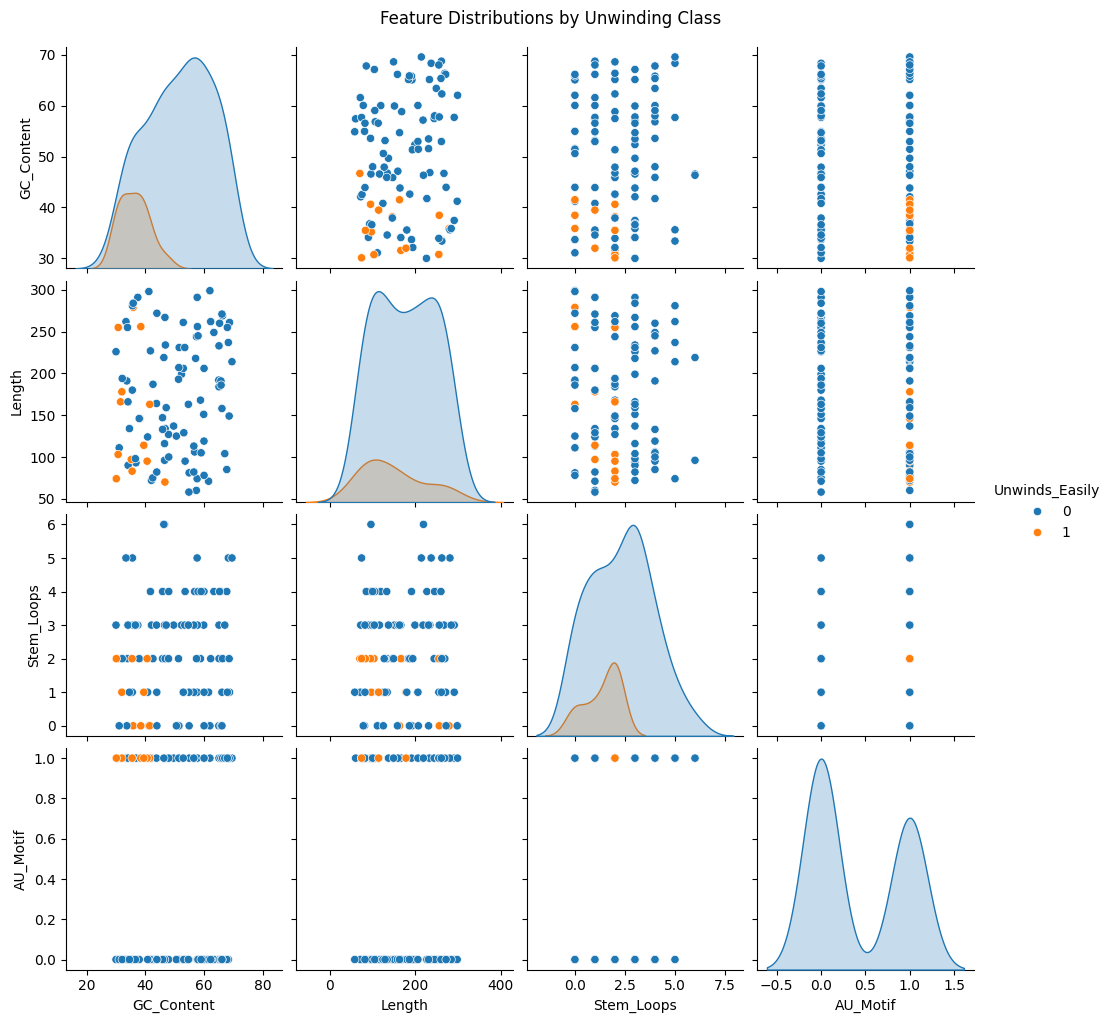

In [9]:
# Visualize distributions of features
sns.pairplot(df, hue='Unwinds_Easily')
plt.suptitle('Feature Distributions by Unwinding Class', y=1.02)
plt.show()

In [5]:
# Train/test split
X = df[['GC_Content', 'Length', 'Stem_Loops', 'AU_Motif']]
y = df['Unwinds_Easily']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



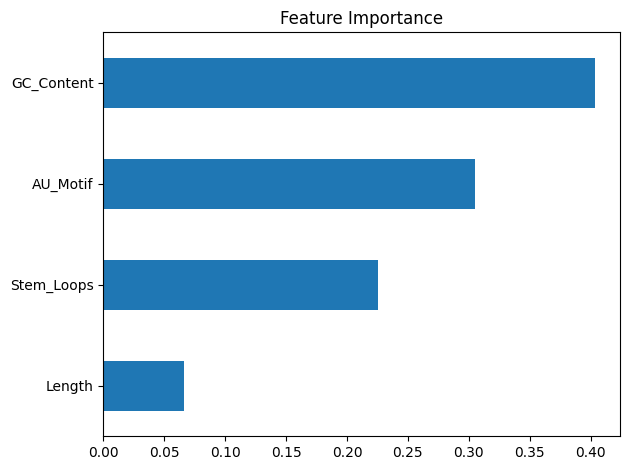

In [7]:
# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()